### Sharon Laurance Muthipeedika
### 312486

### Exercise 3: Recommender Systems using matrix factorization sckit learn

In [1]:
#Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import os
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
os.chdir('gdrive/MyDrive/LAB10')

In [4]:
movie_lens=pd.read_csv("ml-100k/u.data",header=None,delim_whitespace=True)

In [5]:
movie_lens.columns=["User_Id","Movie_Id","Rating","Timestamp"]

In [6]:
c_data = pd.DataFrame()
c_data['id'] = 0
movies = []

for movie in (movie_lens['Movie_Id']):
     if movie not in movies:
            movies.append(movie)
            c_data[movie] = 0

In [7]:
users = [] 
for user in (movie_lens['User_Id']):
  if user not in users:
    users.append(user)
    append_dic = {'id':user}
    for column in c_data.columns:
      if column != 'id':
        append_dic[column] = 0
    c_data = c_data.append(pd.DataFrame([append_dic]))

In [8]:
c_data = c_data.set_index('id')

In [9]:
for index in (range(len(movie_lens)-1)):
     c_data.loc[movie_lens['User_Id'][index],movie_lens['Movie_Id'][index]] = movie_lens['Rating'][index]

In [10]:
np.shape(c_data)

(943, 1682)

In [11]:
# Split the dataframe into a train ,validation and test set
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(c_data,test_size=0.1)
train_data, val_data = train_test_split(train_data,test_size=0.11111)
train_data = pd.DataFrame(train_data)
test_data = pd.DataFrame(test_data)
val_data = pd.DataFrame(val_data)

In [12]:
print(np.shape(train_data))
print(np.shape(val_data))
print(np.shape(test_data))

(753, 1682)
(95, 1682)
(95, 1682)


In [28]:
def rmse_score(R, Q, P):
    I = R != 0  # Indicator function which is zero for missing data
    # print(np.shape(R))
    # print(np.shape(P))
    # print(np.shape(Q))
    ME = I * (R - np.dot(P, Q))  # Errors between real and predicted ratings
    MSE = ME**2  
    return np.sqrt(np.sum(MSE)/np.sum(I))  # sum of squared errors

def matrix_factorization(R,R_val,R_test, P, Q, K, steps=50, alpha=0.0002, beta=0.02):
    Q = Q.T
    train_errors = []
    train_rmse=[]
    val_rmse=[]
    test_rmse = []
    for step in (range(steps)):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
                        # train_rmse.append(rmse_score(R,Q,P))
                        # val_rmse.append(rmse_score(R_val,Q,P))
                        # test_rmse.append(rmse_score(R_test,Q,P))

        eR = np.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
                        train_errors.append(e)
        if e < 0.1:
            break
    return P, Q.T,train_errors

In [29]:
R_train = np.array(train_data)
R_val=np.array(val_data)
R_test=np.array(test_data)
N = len(R_train)
M = len(R_train[0])
K = 2
P = np.random.rand(N,K)
Q = np.random.rand(M,K)
nP, nQ,train_errors = matrix_factorization(R_train,R_val ,R_test,P, Q, K)
nR = np.dot(nP, nQ.T)

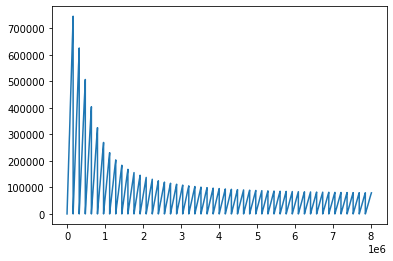

In [30]:
plt.plot(train_errors) #Shows how training error gradually decreases

In [31]:
nR

array([[5.29561365, 5.49469958, 1.62854715, ..., 1.98774309, 0.8425043 ,
        1.61447066],
       [3.67816235, 3.95542524, 1.30157666, ..., 1.06399186, 0.48695845,
        0.96374575],
       [3.60234783, 3.67894243, 1.0356716 , ..., 1.48619851, 0.61469151,
        1.16496554],
       ...,
       [3.95012837, 4.14743019, 1.27461663, ..., 1.3715344 , 0.59395941,
        1.1489337 ],
       [3.60366592, 3.75652596, 1.12954268, ..., 1.31306017, 0.56104071,
        1.07893563],
       [4.76398526, 4.94283619, 1.46475179, ..., 1.78875948, 0.75810076,
        1.45267544]])

In [32]:
print("RMSE error without sklearn is",sqrt(mean_squared_error(R_train,nR)))

RMSE error without sklearn is 2.587267522463938


In [18]:
R = np.array(c_data)
nmf = NMF(init='random', random_state=3116) # Using Sklearn library NMF
W = nmf.fit_transform(R);
H = nmf.components_;
nR = np.dot(W,H)
print(nR)

[[3.00001757e+00 5.44863841e-07 1.96861042e-16 ... 1.05275006e-12
  9.89323108e-13 1.01407386e-12]
 [3.12338714e-05 2.99083477e+00 1.64725190e-08 ... 1.56192899e-14
  1.47655319e-14 1.50734764e-14]
 [2.84813099e-04 9.68810901e-03 9.99959297e-01 ... 3.19579926e-13
  3.00323882e-13 3.07838562e-13]
 ...
 [6.88873937e-04 1.04089168e-03 0.00000000e+00 ... 7.87050160e-16
  7.39595928e-16 7.58123953e-16]
 [2.83539718e-03 4.00070937e+00 0.00000000e+00 ... 8.82063551e-13
  8.28902816e-13 8.49652476e-13]
 [0.00000000e+00 1.58836858e-03 3.92234631e-14 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [19]:
print("RMSE error with NMF is",sqrt(mean_squared_error(R,nR)))

RMSE error with NMF is 0.008396495208566343


#### Compare your results with the results in task 1. List in detail which/how you used these libraries?, what it solves?and why it is selected?. Present your results in form of plots and tables.

As we can see error without sklearn is high as it is 2.58 and error with sklearn.NMF is 0.0083. It is very low also time taken is reduced.

Library used is sklearn.decomposition.NMF() It has model = NMF(n_components=2, init='random', random_state=0)
Time taken is reduced with sklearn library

###### https://stackoverflow.com/questions/29648955/sklearn-matrix-factorization-example
###### https://sdsawtelle.github.io/blog/output/week9-recommender-andrew-ng-machine-learning-with-python.html
###### https://albertauyeung.github.io/2017/04/23/python-matrix-factorization.html/
###### https://medium.com/analytics-vidhya/matrix-factorization-as-a-recommender-system-727ee64683f0